#### https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

### target: 0 – Not looking for job change, 1 – Looking for a job change

# Import the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve

pd.set_option('display.max_columns', None)

# Import the data

In [39]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aug_train.csv')

# Visualize data

### Different plots

In [40]:

def bar_plot(data, col, title=None, display_pct=False, hue=None):
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index, hue=hue)
    if title is None:
        plt.title('Distribution of ' + col)
    else:
        plt.title(title)
    plt.xlabel(col)
    if display_pct:
        labels = (data[col].value_counts())
        for i, v in enumerate(labels):
            ax.text(i, v + 10, str(v), horizontalalignment='center', size=14)
    plt.show()


def box_plot(data, col1, col2, title=None, orient='h'):
    sns.boxplot(data=data, x=col1, y=col2, orient=orient)
    plt.title(title)
    plt.show()


def histogram_plot(data, col, title=None, hue=None):
    sns.displot(data, x=col, hue=hue, element="step")
    # plt.title(title)
    plt.show()


def pie_plot(data, col, title=None):
    plt.figure(figsize=(6, 6))
    piedata = data[col].value_counts()
    plt.pie(x=piedata, autopct="%.1f%%", labels=piedata.index)
    plt.title(title)
    plt.show()


def pair_plot(data):
    sns.pairplot(data)
    plt.show()


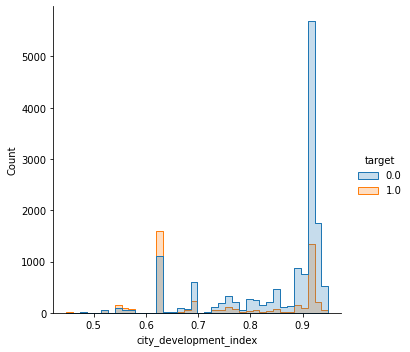

In [41]:
histogram_plot(train_dataset, 'city_development_index', hue='target', title='City development index')

### looks like people from developed cities are less likely to look for a job change

### Gender distribution

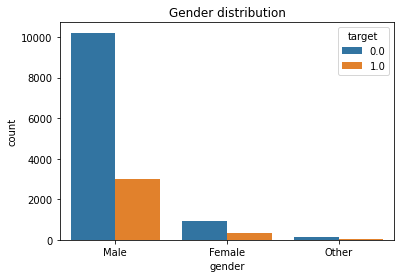

In [42]:
bar_plot(train_dataset, 'gender', title='Gender distribution', hue='target')

### Relevant experience

#### there are employees with more than 20 years of experience in distribution of
#### both employees with relevant experience and no relevant experience


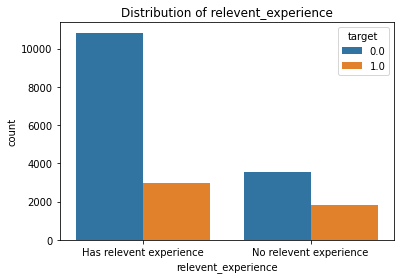

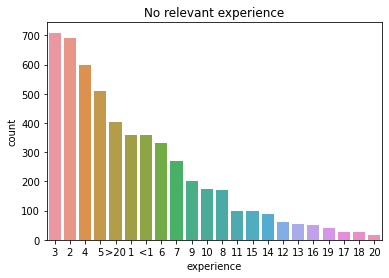

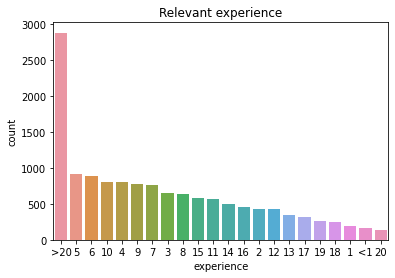

In [43]:
bar_plot(train_dataset, 'relevent_experience', hue='target')
no_relevant_exp = train_dataset[train_dataset['relevent_experience'] == 'No relevent experience']
bar_plot(no_relevant_exp, 'experience', 'No relevant experience')
relevant_exp = train_dataset[train_dataset['relevent_experience'] != 'No relevent experience']
bar_plot(relevant_exp, 'experience', 'Relevant experience')

## visualize enrolled in university

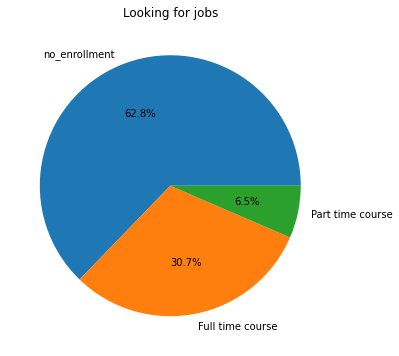

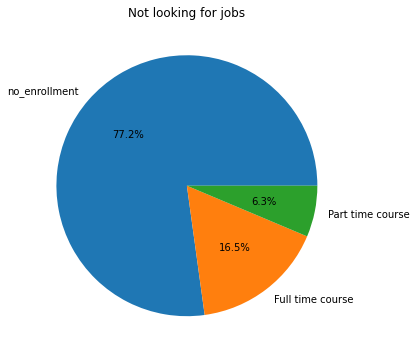

In [44]:
looking_for_job = train_dataset[train_dataset['target'] == 1]
not_looking = train_dataset[train_dataset['target'] == 0]
pie_plot(looking_for_job, 'enrolled_university', 'Looking for jobs')
pie_plot(not_looking, 'enrolled_university', 'Not looking for jobs')

### education level

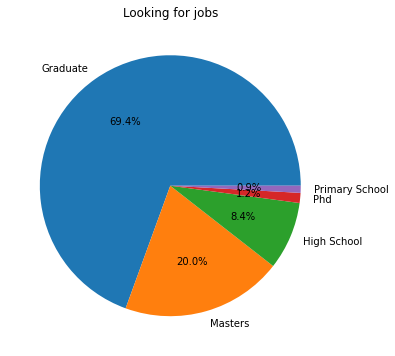

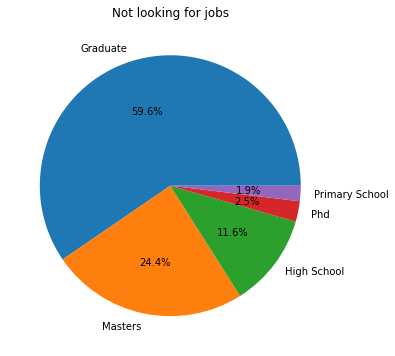

In [45]:
pie_plot(looking_for_job, 'education_level', 'Looking for jobs')
pie_plot(not_looking, 'education_level', 'Not looking for jobs')


### Visualize company size

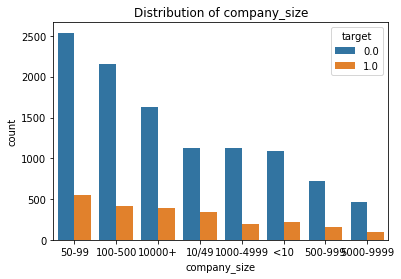

In [46]:
bar_plot(train_dataset, 'company_size', hue='target')

### Visualize for last new job


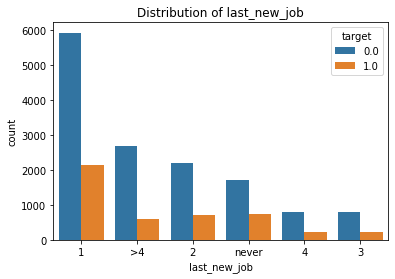

In [47]:
bar_plot(train_dataset, 'last_new_job', hue='target')

### Pair plot - everything with everything

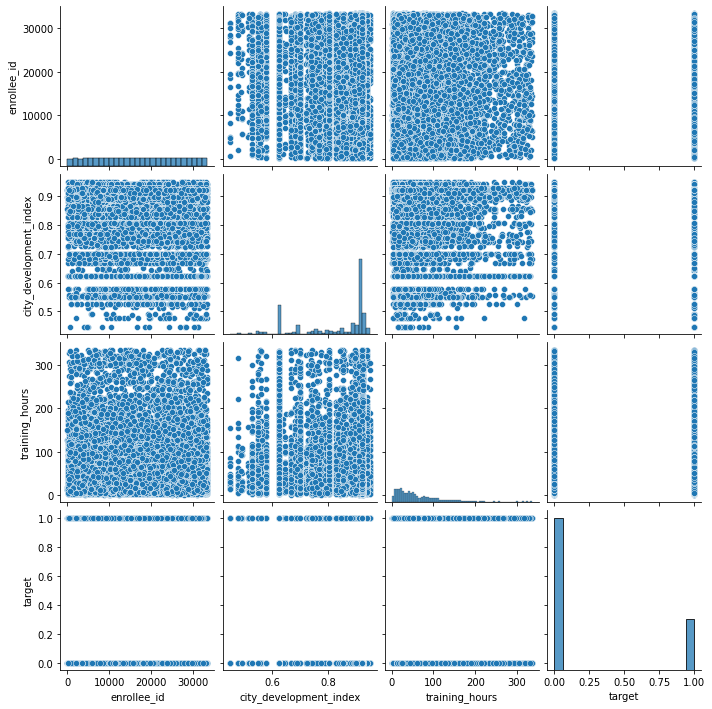

In [48]:
pair_plot(train_dataset)

# Cleanup data

#### Quick description

In [49]:
print(train_dataset.head())
print(train_dataset.info())
print(train_dataset.describe(include='all'))

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

#### Is there any missing data?

In [50]:
print(train_dataset.isnull().mean() * 100)
print(train_dataset.isnull().sum())

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


#### Dropping what is under 3%

In [51]:
train_dataset.dropna(subset=['enrolled_university', 'education_level', 'experience', 'last_new_job'], inplace=True)
print(train_dataset.isnull().mean() * 100)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    21.444432
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline          12.334851
experience                 0.000000
company_size              29.477073
company_type              30.398579
last_new_job               0.000000
training_hours             0.000000
target                     0.000000
dtype: float64


#### Dropping "enrolee_id" as it is an index

In [52]:
train_dataset.drop('enrollee_id', axis=1, inplace=True)
print(train_dataset.head())

       city  city_development_index gender      relevent_experience  \
0  city_103                   0.920   Male  Has relevent experience   
1   city_40                   0.776   Male   No relevent experience   
2   city_21                   0.624    NaN   No relevent experience   
4  city_162                   0.767   Male  Has relevent experience   
5  city_176                   0.764    NaN  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
4       no_enrollment         Masters             STEM        >20   
5    Part time course        Graduate             STEM         11   

  company_size    company_type last_new_job  training_hours  target  
0          NaN             NaN            1              36     1.0  
1        50-99    

#### City and city_development_index are having similar information, they are strictly linked together so dropping 'city'
    

In [53]:
train_dataset.drop('city', axis=1, inplace=True)
print(train_dataset.head())

   city_development_index gender      relevent_experience enrolled_university  \
0                   0.920   Male  Has relevent experience       no_enrollment   
1                   0.776   Male   No relevent experience       no_enrollment   
2                   0.624    NaN   No relevent experience    Full time course   
4                   0.767   Male  Has relevent experience       no_enrollment   
5                   0.764    NaN  Has relevent experience    Part time course   

  education_level major_discipline experience company_size    company_type  \
0        Graduate             STEM        >20          NaN             NaN   
1        Graduate             STEM         15        50-99         Pvt Ltd   
2        Graduate             STEM          5          NaN             NaN   
4         Masters             STEM        >20        50-99  Funded Startup   
5        Graduate             STEM         11          NaN             NaN   

  last_new_job  training_hours  target  
0  

### Splitting into Features and Labels

In [54]:
X = train_dataset.drop('target', axis=1)
y = train_dataset['target']

#### Fixing the Gender - replacing NULL with 'Female' (index[1])

In [55]:
X.loc[X['gender'].isnull(),'gender'] = X['gender'].value_counts().index[1]
print(X.head())

   city_development_index  gender      relevent_experience  \
0                   0.920    Male  Has relevent experience   
1                   0.776    Male   No relevent experience   
2                   0.624  Female   No relevent experience   
4                   0.767    Male  Has relevent experience   
5                   0.764  Female  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
4       no_enrollment         Masters             STEM        >20   
5    Part time course        Graduate             STEM         11   

  company_size    company_type last_new_job  training_hours  
0          NaN             NaN            1              36  
1        50-99         Pvt Ltd           >4              47  
2          NaN            

### Fixing 'major_discipline'

In [56]:
X.loc[X['major_discipline'].isnull(),'major_discipline'] = X['major_discipline'].value_counts().index[1]
print(X.head())

   city_development_index  gender      relevent_experience  \
0                   0.920    Male  Has relevent experience   
1                   0.776    Male   No relevent experience   
2                   0.624  Female   No relevent experience   
4                   0.767    Male  Has relevent experience   
5                   0.764  Female  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
4       no_enrollment         Masters             STEM        >20   
5    Part time course        Graduate             STEM         11   

  company_size    company_type last_new_job  training_hours  
0          NaN             NaN            1              36  
1        50-99         Pvt Ltd           >4              47  
2          NaN            

### Fixing 'company_size' and 'company_type'

In [57]:
X.loc[X['company_size'].isnull(),'company_size'] = X['company_size'].value_counts().index[0]
X.loc[X['company_type'].isnull(),'company_type'] = X['company_type'].value_counts().index[0]
print(X.head())
print(X.isnull().mean() * 100)

   city_development_index  gender      relevent_experience  \
0                   0.920    Male  Has relevent experience   
1                   0.776    Male   No relevent experience   
2                   0.624  Female   No relevent experience   
4                   0.767    Male  Has relevent experience   
5                   0.764  Female  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
4       no_enrollment         Masters             STEM        >20   
5    Part time course        Graduate             STEM         11   

  company_size    company_type last_new_job  training_hours  
0        50-99         Pvt Ltd            1              36  
1        50-99         Pvt Ltd           >4              47  
2        50-99         Pvt

### Encoding features

##### Part 1

In [58]:
X.loc[X['relevent_experience'] == 'No relevent experience','relevent_experience'] = 0
X.loc[X['relevent_experience'] == 'Has relevent experience','relevent_experience'] = 1

X.loc[X['education_level'] == 'Primary School','education_level'] = 0
X.loc[X['education_level'] == 'High School','education_level'] = 1
X.loc[X['education_level'] == 'Graduate','education_level'] = 2
X.loc[X['education_level'] == 'Masters','education_level'] = 3
X.loc[X['education_level'] == 'Phd','education_level'] = 4

X.loc[X['company_size'] == '0','company_size'] = 0
X.loc[X['company_size'] == '<10','company_size'] = 1
X.loc[X['company_size'] == '10/49','company_size'] = 2
X.loc[X['company_size'] == '50-99','company_size'] = 3
X.loc[X['company_size'] == '100-500','company_size'] = 4
X.loc[X['company_size'] == '500-999','company_size'] = 5
X.loc[X['company_size'] == '1000-4999','company_size'] = 6
X.loc[X['company_size'] == '5000-9999','company_size'] = 7
X.loc[X['company_size'] == '10000+','company_size'] = 8

X.loc[X['experience'] == '>20', 'experience'] = 21
X.loc[X['experience'] == '<1', 'experience'] = 0
X.loc[X['last_new_job'] == 'never', 'last_new_job'] = 0
X.loc[X['last_new_job'] == '>4', 'last_new_job'] = 5


X['experience'] = X['experience'].astype(int)
X['last_new_job'] = X['last_new_job'].astype(int)
X['city_development_index'] = X['city_development_index'].astype(float)
X['city_development_index'] = X['city_development_index'].apply(lambda x: x * 1000)
X['training_hours'] = X['training_hours'].astype(int)

print(X.head())

   city_development_index  gender relevent_experience enrolled_university  \
0                   920.0    Male                   1       no_enrollment   
1                   776.0    Male                   0       no_enrollment   
2                   624.0  Female                   0    Full time course   
4                   767.0    Male                   1       no_enrollment   
5                   764.0  Female                   1    Part time course   

  education_level major_discipline  experience company_size    company_type  \
0               2             STEM          21            3         Pvt Ltd   
1               2             STEM          15            3         Pvt Ltd   
2               2             STEM           5            3         Pvt Ltd   
4               3             STEM          21            3  Funded Startup   
5               2             STEM          11            3         Pvt Ltd   

   last_new_job  training_hours  
0             1             

##### Part 2

In [59]:
num_attribs = ['city_development_index', 'education_level', 'experience', 'company_size', 
                'last_new_job', 'training_hours']
cat_attribs = ['gender', 'enrolled_university', 'major_discipline', 'company_type']
preprocessing = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(drop='first', sparse=False), cat_attribs)
], remainder="passthrough")

hr_processed = preprocessing.fit_transform(X)
hr_processed

array([[0.722878081969804, -0.20447540822420285, 1.585345993890866, ...,
        0.0, 1.0, 1],
       [-0.4563674972861359, -0.20447540822420285, 0.6978228857117958,
        ..., 0.0, 1.0, 0],
       [-1.7011267198340705, -0.20447540822420285, -0.7813822945866544,
        ..., 0.0, 1.0, 0],
       ...,
       [0.722878081969804, -0.20447540822420285, 1.585345993890866, ...,
        0.0, 1.0, 1],
       [-0.243448156587146, -1.6569280910912356, -1.5209848847358796,
        ..., 0.0, 1.0, 1],
       [0.19057973022233152, -3.1093807739582684, -1.2251438486761896,
        ..., 0.0, 1.0, 0]], dtype=object)

# Fitting data

### Model function

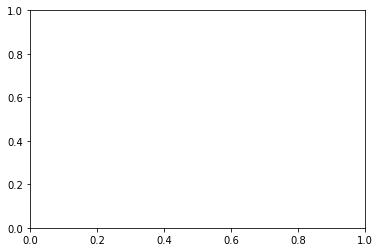

In [60]:
ax = plt.gca()
def Model(model, X_train, X_test, y_train, y_test, title):
  # https://scikit-learn.org/stable/modules/cross_validation.html
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  val_score = cross_val_score(model, X_test, y_test)

  print(title + ' - training set - accuracy score: ', accuracy_score(y_train, y_train_pred))
  print(title + ' - test set - accuracy score: ', accuracy_score(y_test, y_test_pred))
  print(title + ' - training set - confusion matrix: \n', confusion_matrix(y_train, y_train_pred))
  print(title + ' - test set - confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
  print(title + " - %0.2f accuracy with a standard deviation of %0.2f" % (val_score.mean(), val_score.std()))
  plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
  cm = confusion_matrix(y_test, y_test_pred)
  print(cm)

#### Split data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(hr_processed, y, test_size=0.2, shuffle=True, stratify=y)


#### Logistic regression

In [62]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,1000)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid = GridSearchCV(LR, param_grid=param_grid, refit = True, verbose = 3)
# fitting the model for grid search 
grid.fit(X_train , y_train)
grid.best_params_
# summarize
print('Mean Accuracy: %.3f' % grid.best_score_)
print('Config: %s' % grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lbfgs ..................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.01, max_i

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.773, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.769, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, score=0.762, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=sag ....................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.01

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)



[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.770, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.773, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.772, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.765, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................
[CV]  C=0.01, max_iter=100, penalty=l1, solver=saga, score=0.768, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=newton-cg, score=0.770, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=newton-cg ..............
[CV]  C=0.01, max

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.773, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.779, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.774, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.771, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l1, solver=liblinear ...............
[CV]  C=0.1, max_iter=100, penalty=l1, solver=liblinear, score=0.770, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.1, max_iter=100, penalty=l1, solver=sag .....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.776, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.770, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l1, solver=saga ....................
[CV]  C=0.1, max_iter=100, penalty=l1, solver=saga, score=0.770, total=   0.1s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.773, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.778, total=   0.2s
[CV] C=0.1, max_iter=100, penalty=l2, solver=newton-cg ...............
[CV]  C=0.1, max_iter=100, penalty=l2, solver=newton-cg, score=0.774, total=   0.2s
[CV] C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=1, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.773, total=   0.2s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.779, total=   0.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.775, total=   0.2s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.772, total=   0.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, score=0.770, total=   0.2s
[CV] C=1, ma

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=1, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.773, total=   0.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, score=0.778, total=   0.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ..

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=100, pe

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.773, total=   0.2s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.777, total=   0.2s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.774, total=   0.2s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.772, total=   0.2s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.771, total=   0.2s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.773, total=   0.2s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.777, total=   0.2s
[CV] C=10, max_ite

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.1s finished


Mean Accuracy: 0.774
Config: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [63]:
Model(LogisticRegression(C=0.1, max_iter=100, solver='liblinear'), X_train, X_test, y_train, y_test, "Logistic regression")

Logistic regression - training set - accuracy score:  0.7745472208729443
Logistic regression - test set - accuracy score:  0.7696364140993617
Logistic regression - training set - confusion matrix: 
 [[10200   674]
 [ 2575   962]]
Logistic regression - test set - confusion matrix: 
 [[2545  174]
 [ 656  228]]
Logistic regression - 0.76 accuracy with a standard deviation of 0.01
[[2545  174]
 [ 656  228]]


### Linear SVM

#### Tuning parameters

In [64]:
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print('Mean Accuracy: %.3f' % grid.best_score_)
print('Config: %s' % grid.best_params_)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.754, total=   2.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.755, total=   2.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.755, total=   2.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.755, total=   2.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.754, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.754, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.755, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.755, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.755, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.8min finished


Mean Accuracy: 0.755
Config: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2719
         1.0       0.00      0.00      0.00       884

    accuracy                           0.75      3603
   macro avg       0.38      0.50      0.43      3603
weighted avg       0.57      0.75      0.65      3603



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
Model(SVC(kernel='linear', C=0.1, gamma=1), X_train, X_test, y_train, y_test, "SVM model")

SVM model - training set - accuracy score:  0.7545624869891056
SVM model - test set - accuracy score:  0.7546489036913683
SVM model - training set - confusion matrix: 
 [[10874     0]
 [ 3537     0]]
SVM model - test set - confusion matrix: 
 [[2719    0]
 [ 884    0]]
SVM model - 0.75 accuracy with a standard deviation of 0.00
[[2719    0]
 [ 884    0]]


#### K-Nearest Neighbors (K-NN)

##### Tuning the parameters

In [66]:
param_grid = {'weights': ['uniform', 'distance'],  
              'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 
              'metric': ['minkowski', 'euclidian', 'manhatan']
              }
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search 
grid.fit(X_train , y_train)
grid.best_params_
# summarize
print('Mean Accuracy: %.3f' % grid.best_score_)
print('Config: %s' % grid.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.755, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.735, total=   0.5s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.746, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.747, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.731, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=3, weights=distance, score=0.750, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=3, weights=distance, score=0.732, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=3, weights=distance, score=0.743, total=   0.4s
[CV] metric=minkowski, n_neighbors=3, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=3, weights=distance, score=0.739, tot

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

[CV]  metric=euclidian, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidian, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidian, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=5, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=5, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=5, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=5, weights=distance, score=nan, total=   0.0s
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

[CV]  metric=euclidian, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=7, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=7, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=7, weights=distance ...............
[CV]  metric=euclidian, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=9, weights=uniform ................
[CV]  metric=euclidian, n_neighbors=9, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=9, weights=uniform ................
[CV]  metric=euclidian, n_neighbors=9, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=9, weights=uniform ................
[CV]  metric=euclidian, n_neighbors=9, weights=uniform, score=nan, total=   0.0s
[CV

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

[CV]  metric=euclidian, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=11, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=11, weights=distance, score=nan, total=   0.0

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

[CV]  metric=euclidian, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidian, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=13, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=13, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=13, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=13, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=13, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=13, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=13, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=13, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=13, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=13, weights=distance, score=nan, total=   

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=euclidian, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidian, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=3, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=3, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=3, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=3, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=3, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=3, weights=uniform, score=nan, total=   0.0s
[C

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

[CV]  metric=manhatan, n_neighbors=3, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=5, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=5, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=5, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=5, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=5, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=5, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=5, weights=distance ................
[CV]  metric=manhatan, n_neighbors=5, weights=distance, score=nan, total=   0.0s
[CV] metric=

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  metric=manhatan, n_neighbors=7, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=7, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=7, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=7, weights=uniform .................
[CV]  metric=manhatan, n_neighbors=7, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=7, weights=distance ................
[CV]  metric=manhatan, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=7, weights=distance ................
[CV]  metric=manhatan, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=7, weights=distance ................
[CV]  metric=manhatan, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=7, weights=distance ................
[CV]  metric=manhatan, n_neighbors=7, weights=distance, score=nan, total=   0.0s
[CV] metri

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  metric=manhatan, n_neighbors=9, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=9, weights=distance ................
[CV]  metric=manhatan, n_neighbors=9, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=9, weights=distance ................
[CV]  metric=manhatan, n_neighbors=9, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=9, weights=distance ................
[CV]  metric=manhatan, n_neighbors=9, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=9, weights=distance ................
[CV]  metric=manhatan, n_neighbors=9, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=11, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=11, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=11, weights=uniform, score=nan, total=   0.0s
[CV] me

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  metric=manhatan, n_neighbors=11, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=11, weights=distance ...............
[CV]  metric=manhatan, n_neighbors=11, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=13, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=13, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=13, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=13, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=13, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=13, weights=uniform, score=nan, total=   0.0s
[CV] 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

[CV]  metric=manhatan, n_neighbors=15, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=15, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=15, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=15, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=15, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=15, weights=uniform ................
[CV]  metric=manhatan, n_neighbors=15, weights=uniform, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=15, weights=distance ...............
[CV]  metric=manhatan, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=15, weights=distance ...............
[CV]  metric=manhatan, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV] metric=manhatan, n_neighbors=15, weights=distance ...............
[CV]  metric=manhatan, n_neighbors=15, weights=distance, score=nan, total=   0.0s
[CV]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueEr

Mean Accuracy: 0.772
Config: {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}


In [67]:
Model(KNeighborsClassifier(n_neighbors=15, metric='minkowski', weights='uniform'), X_train, X_test, y_train, y_test, "K nearest neighbor")

K nearest neighbor - training set - accuracy score:  0.7978627437374228
K nearest neighbor - test set - accuracy score:  0.7596447404940327
K nearest neighbor - training set - confusion matrix: 
 [[10003   871]
 [ 2042  1495]]
K nearest neighbor - test set - confusion matrix: 
 [[2441  278]
 [ 588  296]]
K nearest neighbor - 0.76 accuracy with a standard deviation of 0.01
[[2441  278]
 [ 588  296]]


#### Kernek-SVM

### Tuning the parameters

In [68]:
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,)
# fitting the model for grid search 
grid.fit(X_train , y_train)
grid.best_params_
# summarize
print('Mean Accuracy: %.3f' % grid.best_score_)
print('Config: %s' % grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.765, total=   8.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   8.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.766, total=   8.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.766, total=   8.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.764, total=   8.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.779, total=   6.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.783, total=   6.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.779, total=   6.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.770, total=   6.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  6.6min finished


Mean Accuracy: 0.781
Config: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [69]:
Model(SVC(kernel='rbf', C=1, gamma=0.1), X_train, X_test, y_train, y_test, "Kernel SVM")
plt.show()

Kernel SVM - training set - accuracy score:  0.7888418569148568
Kernel SVM - test set - accuracy score:  0.7690813211212878
Kernel SVM - training set - confusion matrix: 
 [[10071   803]
 [ 2240  1297]]
Kernel SVM - test set - confusion matrix: 
 [[2484  235]
 [ 597  287]]
Kernel SVM - 0.76 accuracy with a standard deviation of 0.00
[[2484  235]
 [ 597  287]]
